Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Analysis

In [2]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.drop(columns=['id'], inplace=True)

In [4]:
# print head -> first 5 rows of the dataset
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# print tail -> last 5 rows of the dataset
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
# number of rows and columns in the dataset
df.shape

(400, 25)

In [7]:
# getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [8]:
unique_values = df['classification'].unique()
print(unique_values)

['ckd' 'ckd\t' 'notckd']


In [9]:
df['dm'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace=True)
df['cad'] = df['cad'].str.replace('\tno', 'no')
df['classification'].replace({'ckd\t': 'ckd', 'notckd': ' notckd'}, inplace=True)

In [10]:
# Convert object columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder.fit_transform(df[col])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,32,72,34,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,NaN,...,26,56,49,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,49,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,0,0,0,0,0,1


In [11]:
# checking for missing values
df.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [12]:
columns_to_fill_ = ['age', 'bu', 'sc']

for column in columns_to_fill_:
    df = df.dropna(subset=[column])

# Check if missing values are filled
print(df.isnull().sum())

age                0
bp                10
sg                44
al                42
su                45
rbc                0
pc                 0
pcc                0
ba                 0
bgr               29
bu                 0
sc                 0
sod               70
pot               71
hemo              44
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64


In [13]:
columns_to_fill = ['sod', 'pot', 'bp', 'sg', 'al', 'su', 'bgr', 'hemo']

for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

# Check if missing values are filled
print(df.isnull().sum())

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [14]:
# observing statistical measures about the data
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,...,371.000000,371.000000,371.000000,371.000000,371.000000,371.00000,371.000000,371.000000,371.000000,371.000000
mean,51.781671,76.481994,1.017554,1.012158,0.460123,1.266846,0.962264,0.134771,0.080863,147.634503,...,29.652291,63.692722,34.382749,0.388140,0.358491,0.09973,0.215633,0.196765,0.153639,0.614555
std,16.948676,13.698701,0.005338,1.269125,1.051359,0.646367,0.586957,0.372216,0.310075,75.818405,...,10.415963,28.079278,13.441530,0.498939,0.491332,0.31755,0.418328,0.404823,0.368498,0.487357
min,3.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.000000,...,22.000000,46.500000,26.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.017554,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,124.000000,...,30.000000,70.000000,35.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.460123,2.000000,1.000000,0.000000,0.000000,154.500000,...,38.000000,90.500000,49.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,44.000000,92.000000,49.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000


In [15]:
# checking the distribution of Target Variable
df['classification'].value_counts()

classification
1    228
0    143
Name: count, dtype: int64

Explorartory Data Analysis

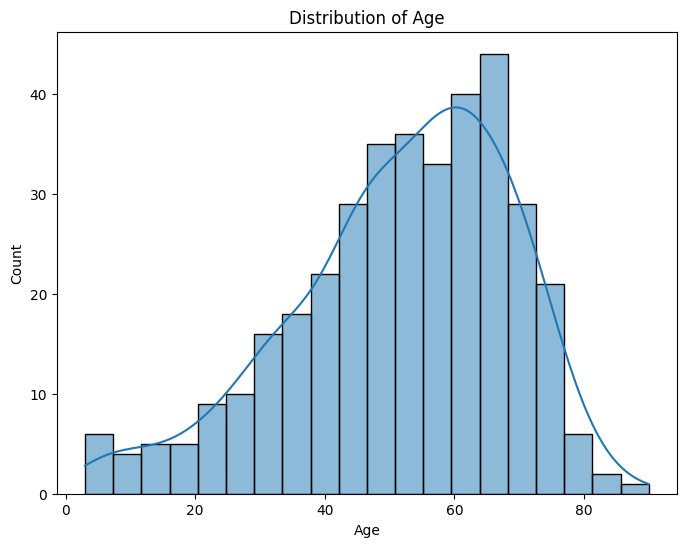

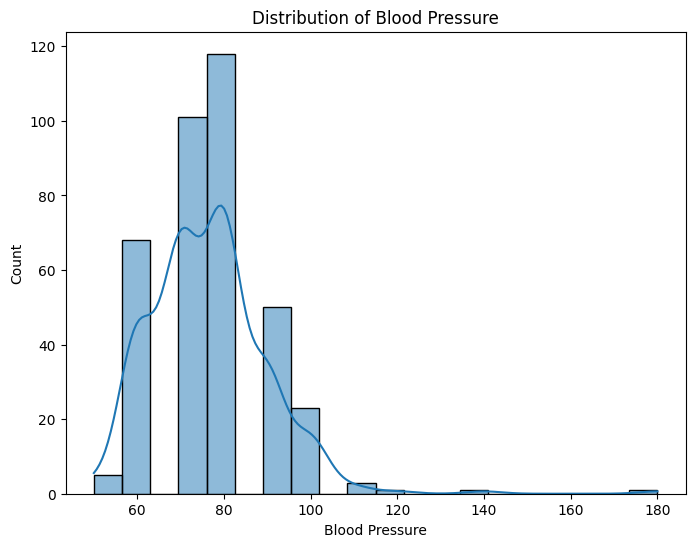

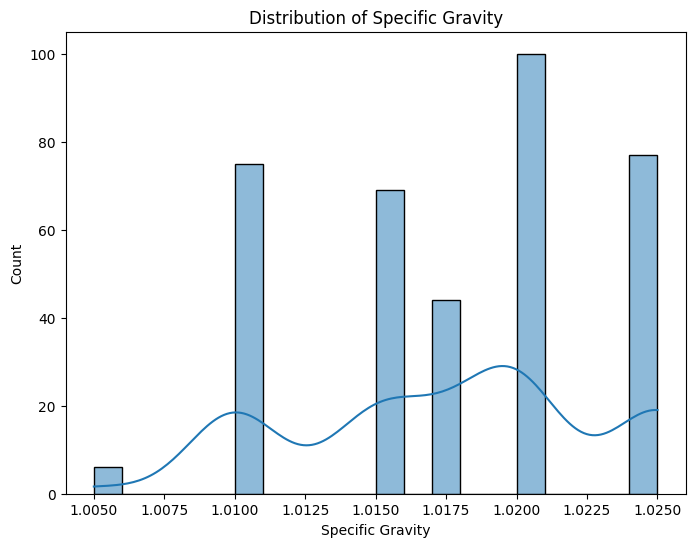

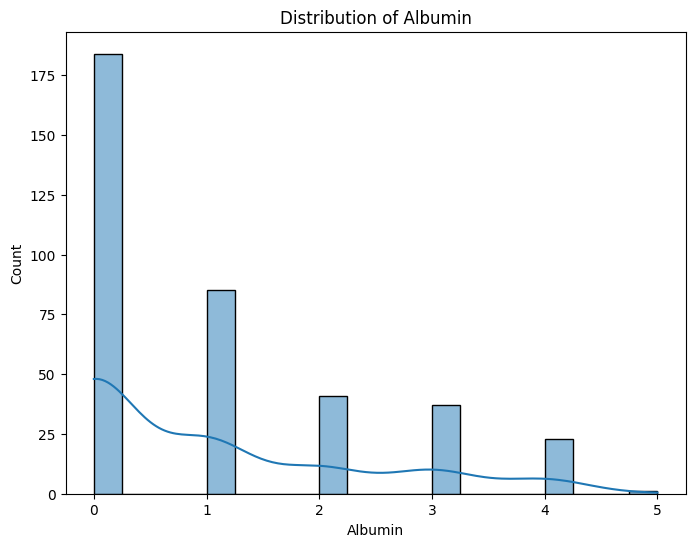

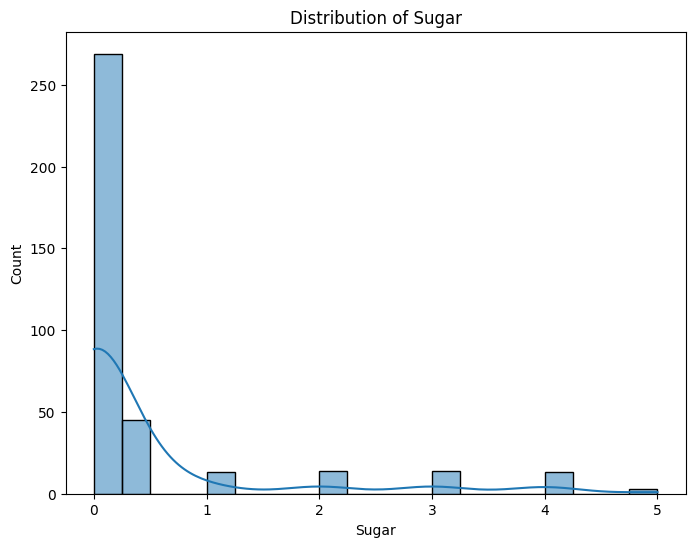

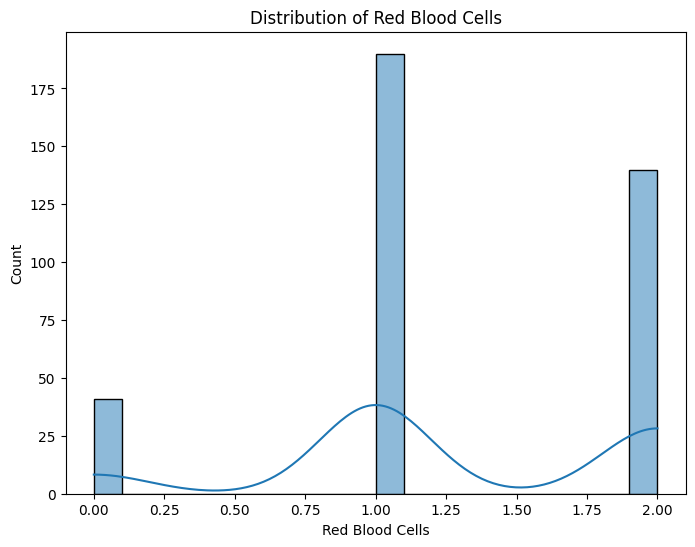

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of blood pressure (bp)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='bp', bins=20, kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of specific gravity (sg)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sg', bins=20, kde=True)
plt.title('Distribution of Specific Gravity')
plt.xlabel('Specific Gravity')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of albumin (al)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='al', bins=20, kde=True)
plt.title('Distribution of Albumin')
plt.xlabel('Albumin')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of sugar (su)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='su', bins=20, kde=True)
plt.title('Distribution of Sugar')
plt.xlabel('Sugar')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of red blood cells (rbc)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rbc', bins=20, kde=True)
plt.title('Distribution of Red Blood Cells')
plt.xlabel('Red Blood Cells')
plt.ylabel('Count')
plt.show()

# Continue the pattern for the remaining features...


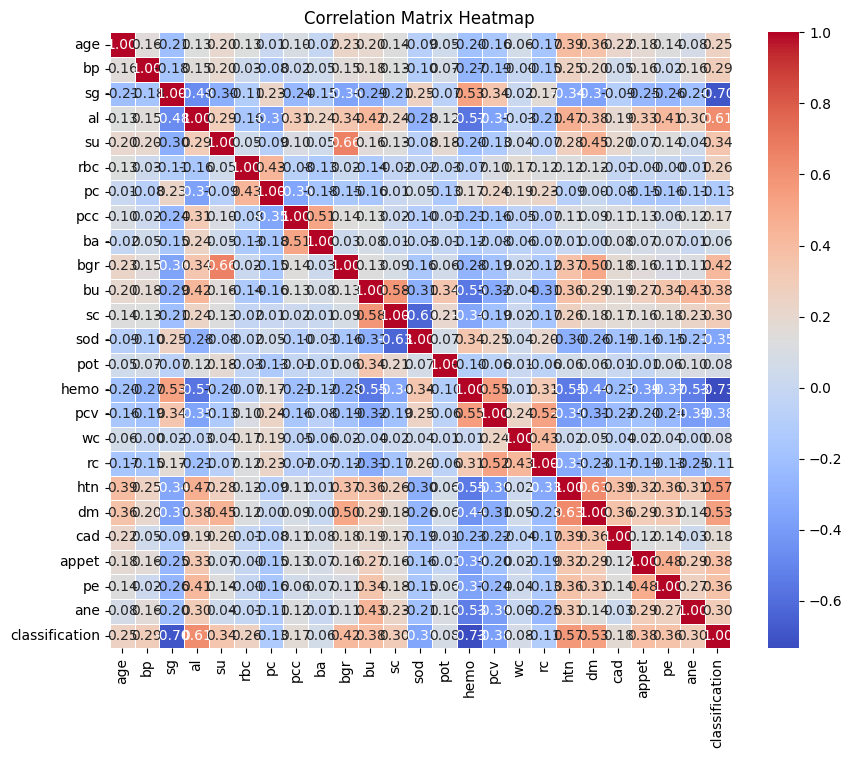

In [17]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

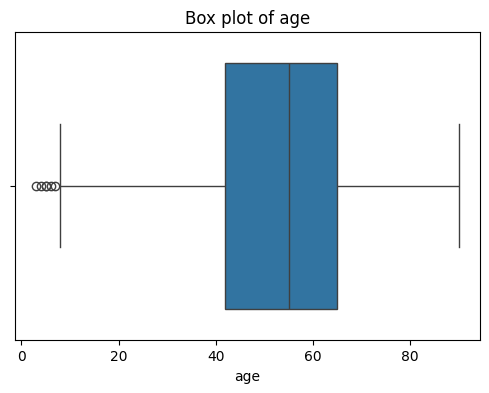

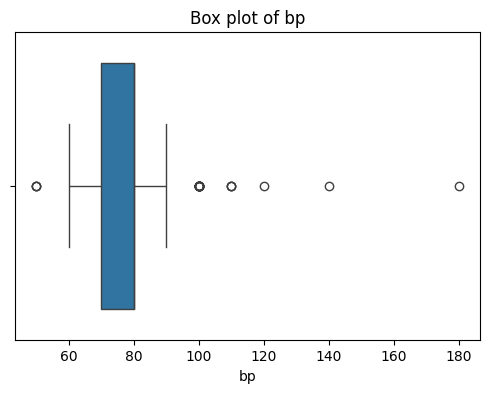

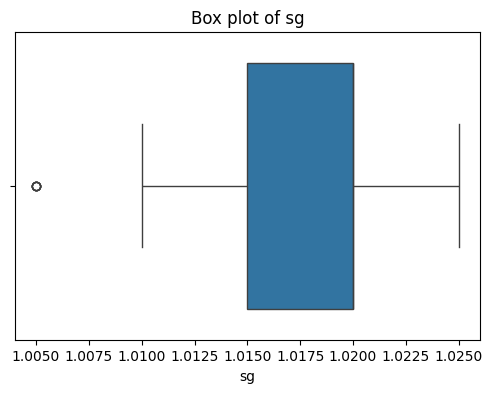

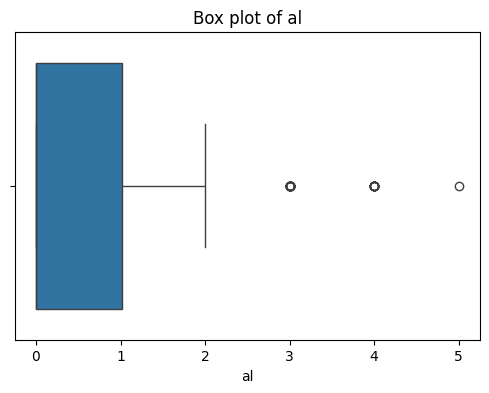

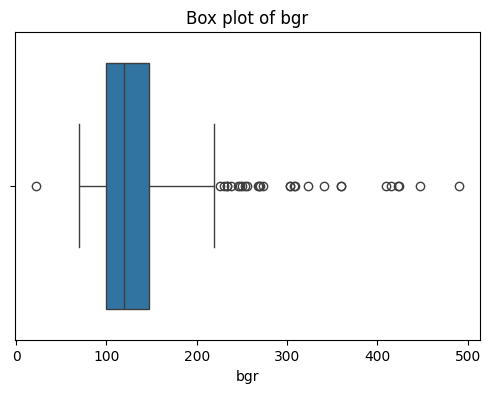

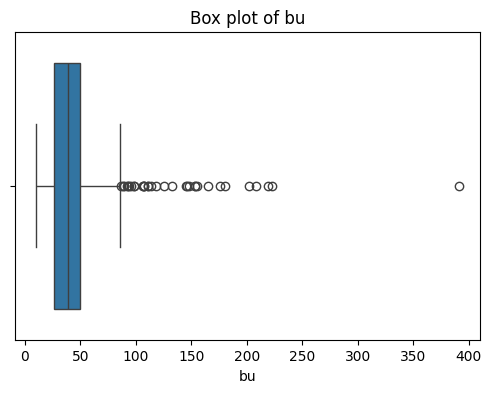

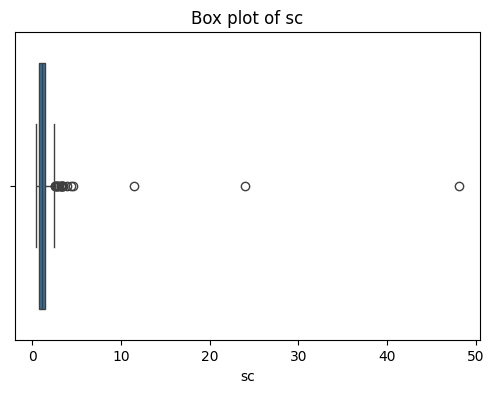

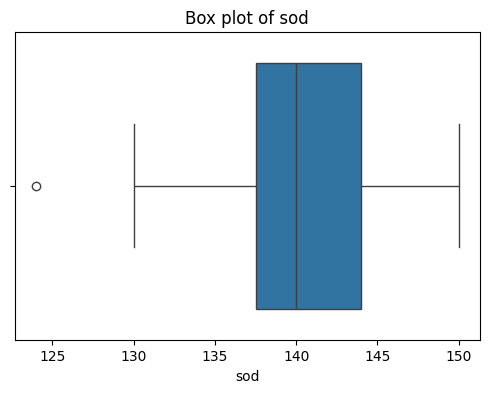

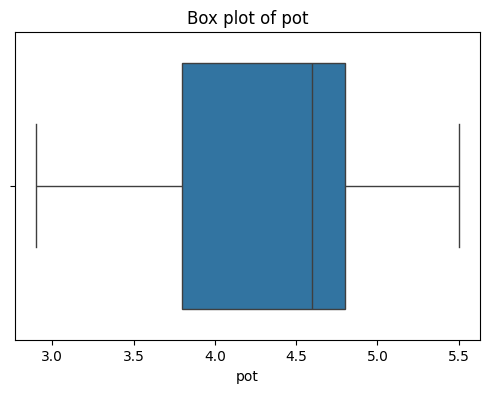

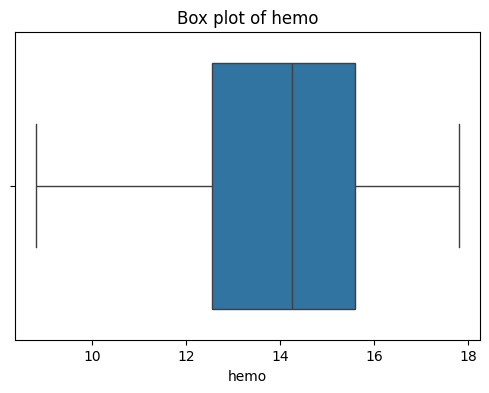

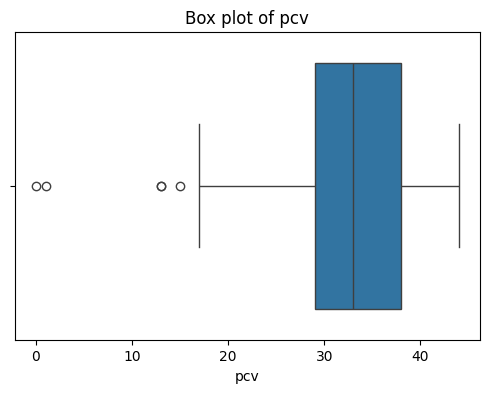

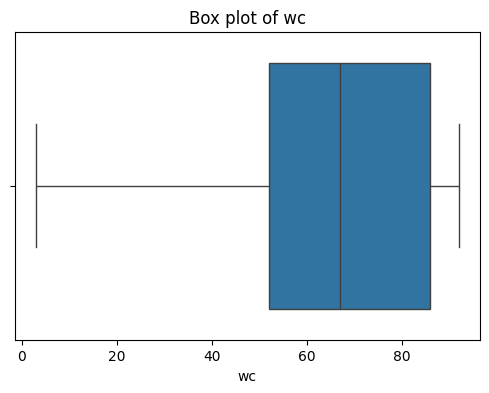

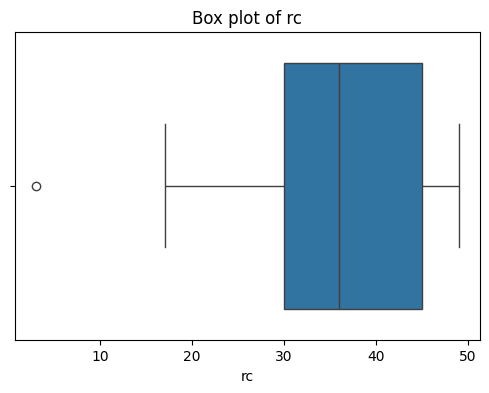

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def display_outliers_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_process = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

for column in columns_to_process:
    display_outliers_boxplot(df, column)
    df = remove_outliers(df, column)
    df.reset_index(drop=True, inplace=True)


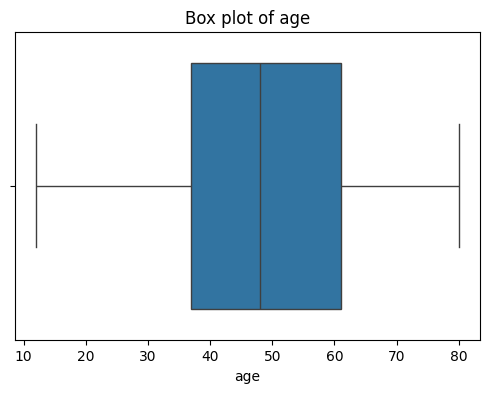

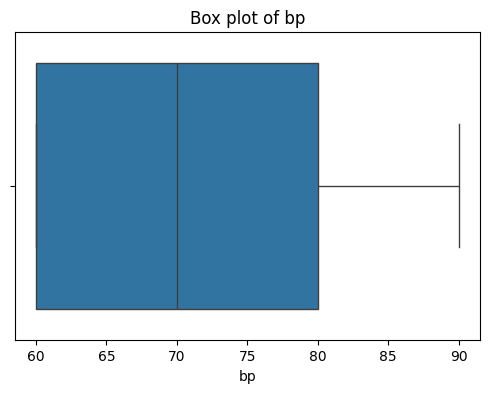

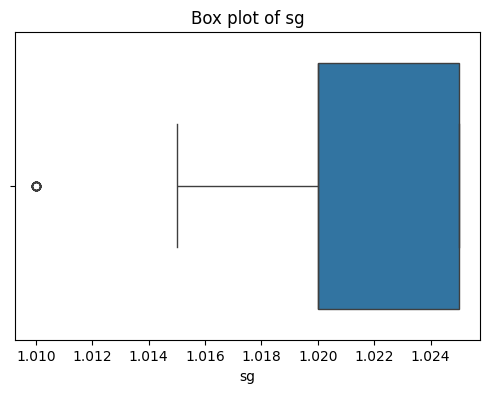

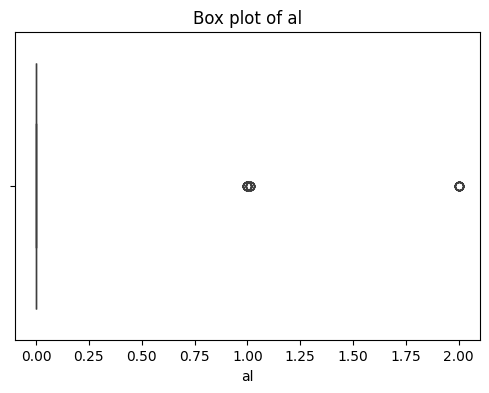

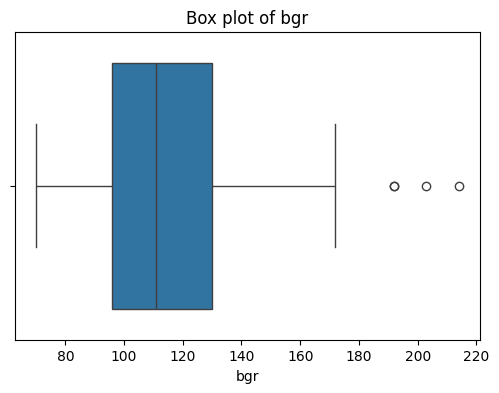

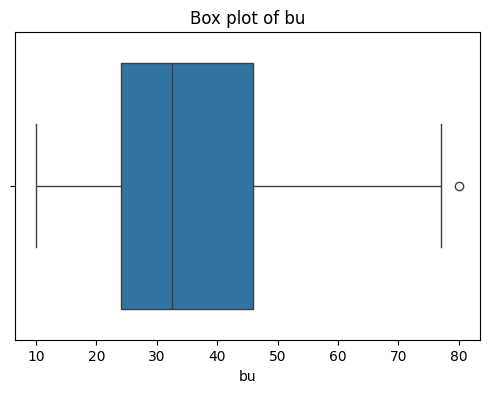

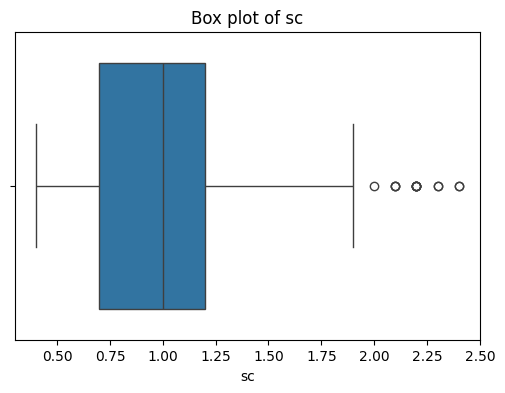

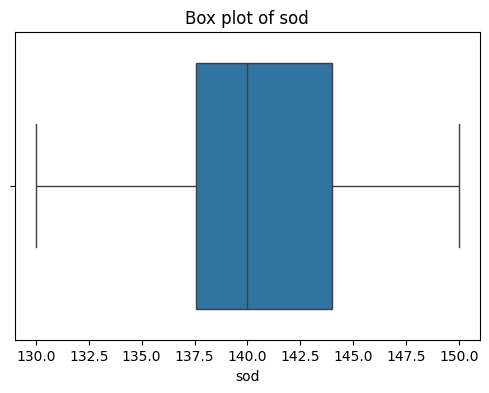

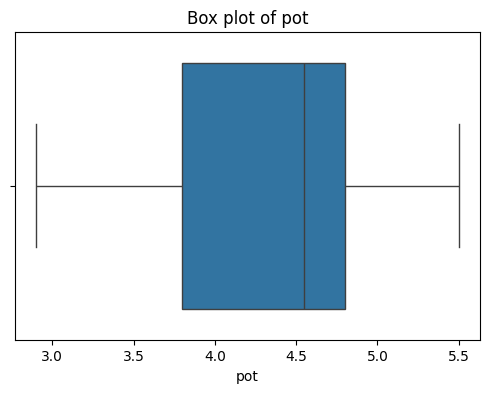

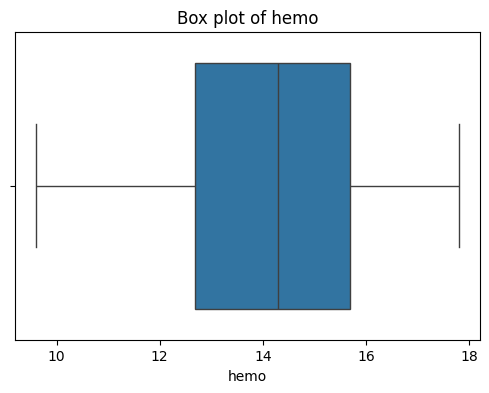

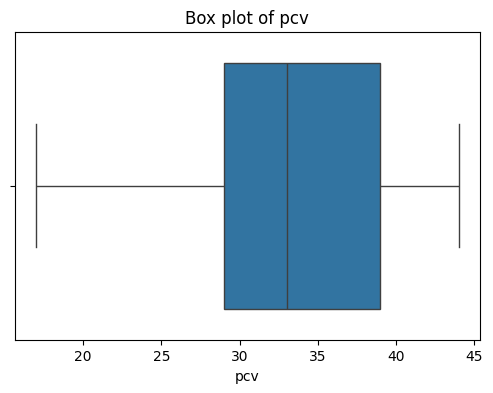

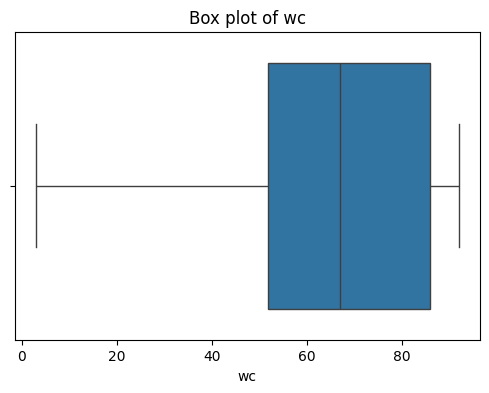

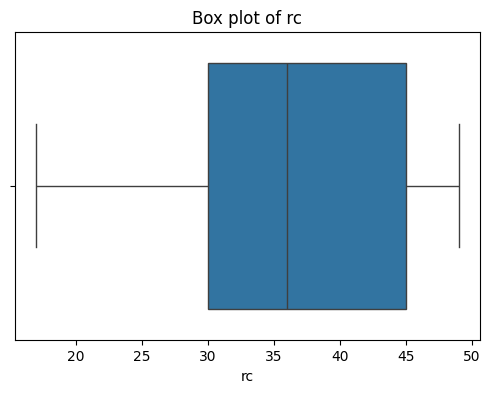

In [19]:
#after removing all the outliers
columns_to_process = ['age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

for column in columns_to_process:
    display_outliers_boxplot(df, column)


In [20]:
X = df.drop(columns='classification', axis=1)
Y = df['classification']

In [21]:
print(X)

      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo  pcv  wc  \
0    48.0  80.0  1.020  1.0  0.0    2   1    0   0  121.0  ...  15.4   32  72   
1    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6   23  68   
2    47.0  70.0  1.015  2.0  0.0    2   1    0   0   99.0  ...  12.6   44  92   
3    62.0  60.0  1.015  1.0  0.0    2   0    1   0  100.0  ...  10.3   18  49   
4    61.0  60.0  1.025  0.0  0.0    2   1    0   0  108.0  ...   9.9   17  78   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...  ...  ..   
191  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  15.7   35  62   
192  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  16.5   42  72   
193  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  15.8   37  61   
194  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  14.2   39  67   
195  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...  15.8   41  63   

     rc  htn  dm  cad  appe

In [22]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
191    0
192    0
193    0
194    0
195    0
Name: classification, Length: 196, dtype: int64


Splitting Training and Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(196, 24) (156, 24) (40, 24)


Training the Model and Evaluation

KNN Training Accuracy: 0.88
KNN Test Accuracy: 0.85
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.86      0.55      0.67        11

    accuracy                           0.85        40
   macro avg       0.85      0.76      0.78        40
weighted avg       0.85      0.85      0.84        40

KNN Confusion Matrix:
[[28  1]
 [ 5  6]]


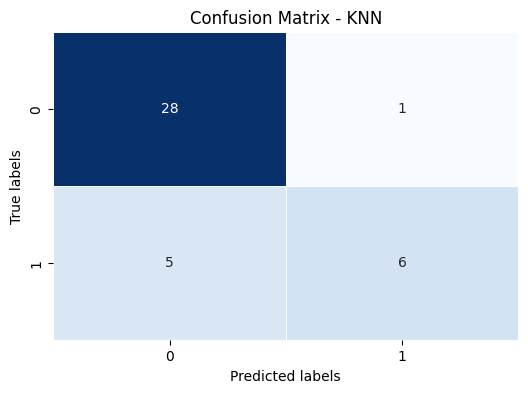

-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.99
Logistic Regression Test Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.91      0.91      0.91        11

    accuracy                           0.95        40
   macro avg       0.94      0.94      0.94        40
weighted avg       0.95      0.95      0.95        40

Logistic Regression Confusion Matrix:
[[28  1]
 [ 1 10]]


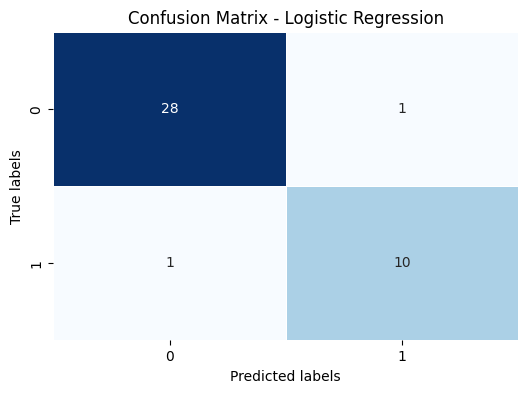

-------------------------------------------------------
Naive Bayes Training Accuracy: 0.97
Naive Bayes Test Accuracy: 0.93
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.79      1.00      0.88        11

    accuracy                           0.93        40
   macro avg       0.89      0.95      0.91        40
weighted avg       0.94      0.93      0.93        40

Naive Bayes Confusion Matrix:
[[26  3]
 [ 0 11]]


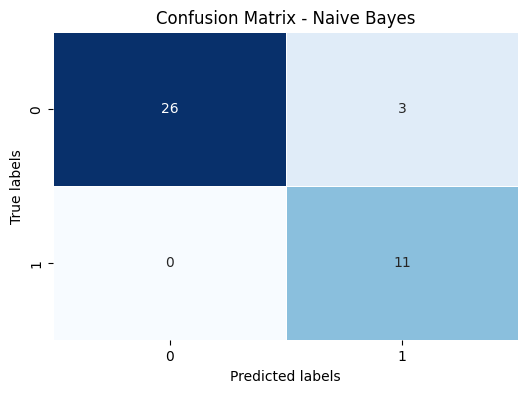

-------------------------------------------------------


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Training model



models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Evaluate the model on training data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    print(f'{model_name} Training Accuracy: {train_accuracy:.2f}')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    test_accuracy = accuracy_score(Y_test, y_pred)
    print(f'{model_name} Test Accuracy: {test_accuracy:.2f}')

    # Generate a classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(Y_test, y_pred))

    # Generate a confusion matrix
    # cm = confusion_matrix(Y_test, y_pred)
    # print(f'{model_name} Confusion Matrix:')
    # print(cm)
    # Generate a confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f'{model_name} Confusion Matrix:')
    print(cm)

    # Heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    print('-' * 55)

Saving the Model

In [26]:
#importing library
import pickle

In [27]:
filename = 'ckd_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
loaded_model = pickle.load(open('ckd_model.sav', 'rb'))